In [44]:
from connect4.policy import Policy
from connect4.utils import find_importable_classes
from tournament import run_tournament, play
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import defaultdict
from connect4.connect_state import ConnectState

In [39]:
participants = find_importable_classes("groups", Policy)
players = list(participants.items())
W=[]
a=0
t=1
for i in range(t):
    champion = run_tournament(
        players,
        play,  # You could also create your own play function for testing purposes
        shuffle=True,
        best_of=10,
        seed=123
    )
    w,x=champion
    W.append(w)
    if(w == 'Grupo X1'):
        a+=1

print("Champion:", W)
progres = ""
remanining = ""
for i in range(round(a*10/t)):
    progres+="█"
if 10-round(a+10/t) > 0:
    for i in range(11-round(a+10/t)):
        remanining+="■"
print(f"Ganó {a} veces")
print(f"=== {round(a*100/t)}% ["+progres+remanining+"]===")

Initial Matches: [(('GroupC', <class 'groups.GroupC.policy.politica_epica'>), ('GrupoX1', <class 'groups.GrupoX1.policy.politica_epica'>))]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
[0, 1, 2, 3, 4, 5, 6]
aleatorio preferido: 2
aleatorio: columna 2
check_state returned: 2
RETORNANDO --> 2 <class 'int'>
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0 -1  0  0  0  0]]
[0, 1, 2, 3, 4, 5, 6]
aleatorio preferido: 2
aleatorio: columna 2
check_state returned: 2
RETORNANDO --> 2 <class 'int'>
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0 -1  0  0  0  0]]
[0, 1, 2, 3, 4, 5, 6]
aleatorio preferido: 2
aleatorio: columna 2
check_state returned: 2
RETORNANDO --> 2 <class 'int'>
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0 -1  0  0  0  0]
 [ 0  0 

In [16]:
matches = ["versus/match_GrupoX1_vs_GroupC.json", "versus/match_GroupC_vs_GrupoX1.json"]
results = []

for match_file in matches:
    with open(match_file) as f:
        match_data = json.load(f)
    
    for game in match_data["games"]:
        winner = game[-1][0]  # o usa ConnectState para calcularlo
        length = len(game)
        actions = [a for _, a in game]
        results.append({
            "winner": winner,
            "length": length,
            "actions": actions,
            "match_file": match_file
        })

# Ejemplo: columna más jugada
col_counts = defaultdict(int)
for r in results:
    for a in r["actions"]:
        col_counts[a] += 1

In [17]:
print(col_counts)

defaultdict(<class 'int'>, {2: 7044, 3: 7044, 6: 2287, 5: 2740, 1: 3155, 4: 3133, 0: 2782})


In [62]:
def load_matches(match_dir):
    matches = []
    for filename in os.listdir(match_dir):
        if filename.endswith(".json"):
            path = os.path.join(match_dir, filename)
            with open(path) as f:
                # json.load convierte el contenido JSON a dict/list
                match_data = json.load(f)
                match_data["match_file"] = filename
                matches.append(match_data)
    return matches

def extract_game_data(matches):
    records = []
    
    for match in matches:
        player_a = match["player_a"]
        player_b = match["player_b"]
        match_file = match.get("match_file", "unknown")
        
        for game in match["games"]:
            state = ConnectState()  # tablero vacío
            actions = [action for _, action in game]  # lista de acciones
            
            for action in actions:
                state = state.transition(action)  # aplicar acción
            
            winner_id = state.get_winner()  # -1, 1 o 0
            
            if winner_id == -1:
                winner = player_a
            elif winner_id == 1:
                winner = player_b
            else:
                winner = "draw"
            
            records.append({
                "match_file": match_file,
                "player_a": player_a,
                "player_b": player_b,
                "winner": winner,
                "length": len(actions),
                "actions": actions
            })
    
    return pd.DataFrame(records)

# Cargar y procesar datos
MATCH_DIR = "versus"
matches = load_matches(MATCH_DIR)
df_games = extract_game_data(matches)

# Mostrar primeras filas
df_games.head()

,match_file,player_a,player_b,winner,length,actions
0,match_GroupC_vs_GrupoX1.json,GroupC,GrupoX1,draw,42,"[2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 5, 4, 4, ..."
1,match_GroupC_vs_GrupoX1.json,GroupC,GrupoX1,GroupC,15,"[2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 1, 5]"
2,match_GroupC_vs_GrupoX1.json,GroupC,GrupoX1,GrupoX1,38,"[2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 0, 1, 0, ..."
3,match_GroupC_vs_GrupoX1.json,GroupC,GrupoX1,GroupC,15,"[2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 1, 5]"
4,match_GroupC_vs_GrupoX1.json,GroupC,GrupoX1,GroupC,23,"[2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 0, 1, 1, ..."


In [ ]:
# Número total de partidas
print("Número total de partidas:", len(df_games))

# Distribución de victorias por jugador
victory_counts = df_games['winner'].value_counts()
print("Victorias por jugador:\n", victory_counts)

# Promedio de duración de partidas por ganador
avg_length = df_games.groupby('winner')['length'].mean()
print("Duración promedio por ganador:\n", avg_length)

# Estadísticas generales
print(df_games.describe())

Número total de partidas: 112
Victorias por jugador:
 winner
GrupoX1    71
GroupC     32
draw        9
Name: count, dtype: int64
Duración promedio por ganador:
 winner
GroupC     27.500000
GrupoX1    19.929577
draw       42.000000
Name: length, dtype: float64
           length
count  112.000000
mean    23.866071
std      9.867131
min     15.000000
25%     15.000000
50%     20.000000
75%     31.250000
max     42.000000


In [67]:

def plot_victories(df_games, top_n=None):
   
    victory_counts = df_games['winner'].value_counts()
    if top_n:
        victory_counts = victory_counts.head(top_n)
    
    plt.figure(figsize=(10,6))
    sns.barplot(x=victory_counts.index, y=victory_counts.values, palette="viridis")
    plt.title("Victorias por jugador")
    plt.xlabel("Jugador")
    plt.ylabel("Número de victorias")
    plt.xticks(rotation=45)
    plt.show()


def plot_avg_game_length(df_games):

    avg_length = df_games.groupby('winner')['length'].mean()
    
    plt.figure(figsize=(10,6))
    sns.barplot(x=avg_length.index, y=avg_length.values, palette="magma")
    plt.title("Duración promedio de partidas por ganador")
    plt.xlabel("Jugador")
    plt.ylabel("Promedio de movimientos")
    plt.xticks(rotation=45)
    plt.show()


def plot_game_length_distribution(df_games):

    plt.figure(figsize=(10,6))
    sns.histplot(df_games['length'], bins=20, kde=True, color="skyblue")
    plt.title("Distribución de longitud de partidas")
    plt.xlabel("Número de movimientos")
    plt.ylabel("Cantidad de partidas")
    plt.show()



def plot_win_draw_ratio(df_games):

    counts = df_games['winner'].value_counts(normalize=True)
    plt.figure(figsize=(8,8))
    counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
    plt.title("Proporción de victorias y empates")
    plt.ylabel("")
    plt.show()

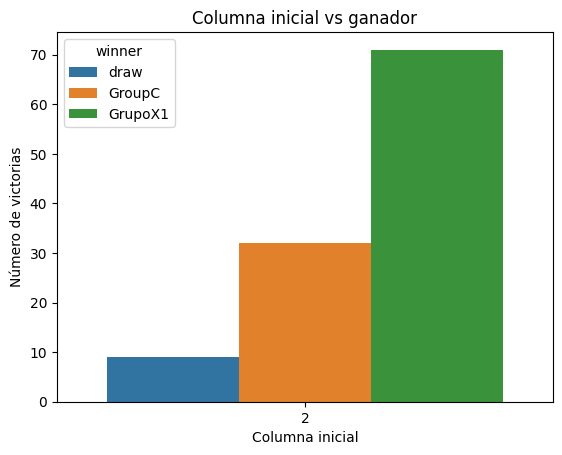

In [65]:
# Frecuencia de victoria por columna inicial
df_games['first_move'] = df_games['actions'].apply(lambda x: x[0] if x else -1)
sns.countplot(x='first_move', hue='winner', data=df_games)
plt.title("Columna inicial vs ganador")
plt.xlabel("Columna inicial")
plt.ylabel("Número de victorias")
plt.show()

C:\Users\JONATAN\AppData\Local\Temp\ipykernel_16156\370279202.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=victory_counts.index, y=victory_counts.values, palette="viridis")


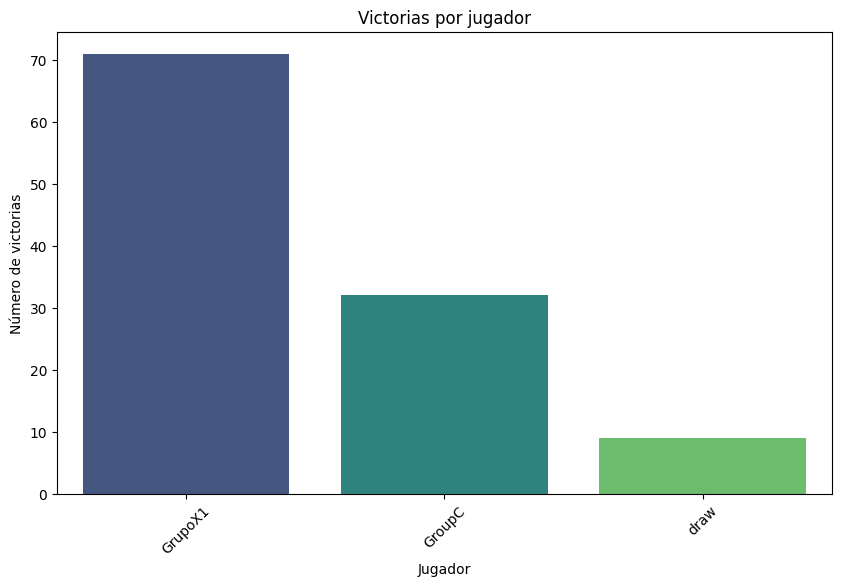

C:\Users\JONATAN\AppData\Local\Temp\ipykernel_16156\370279202.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_length.index, y=avg_length.values, palette="magma")


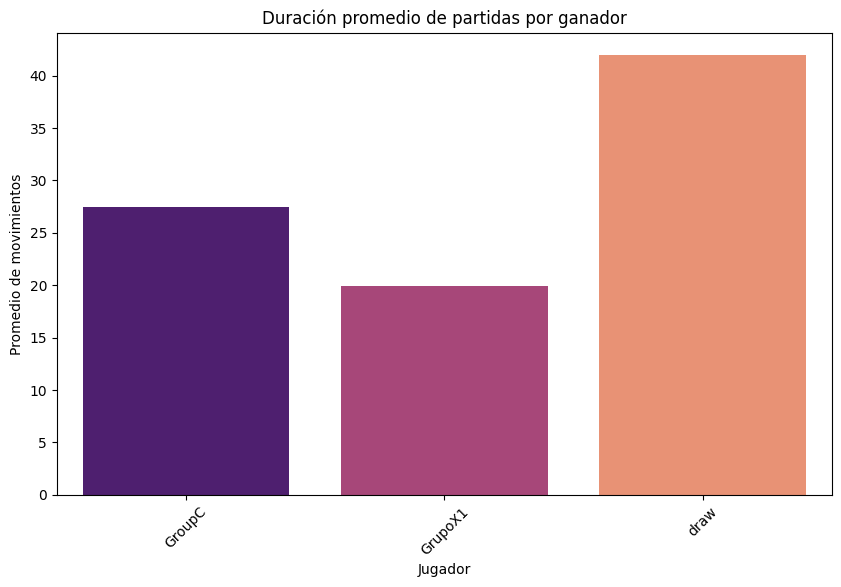

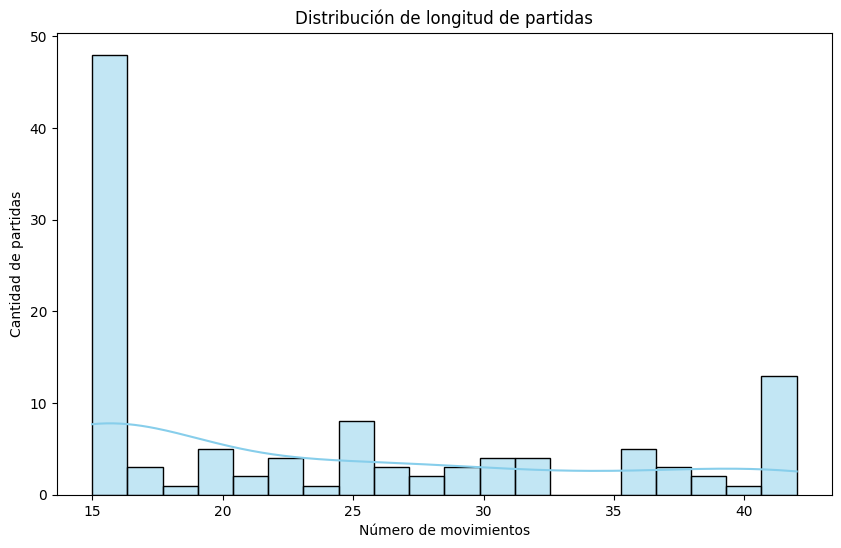

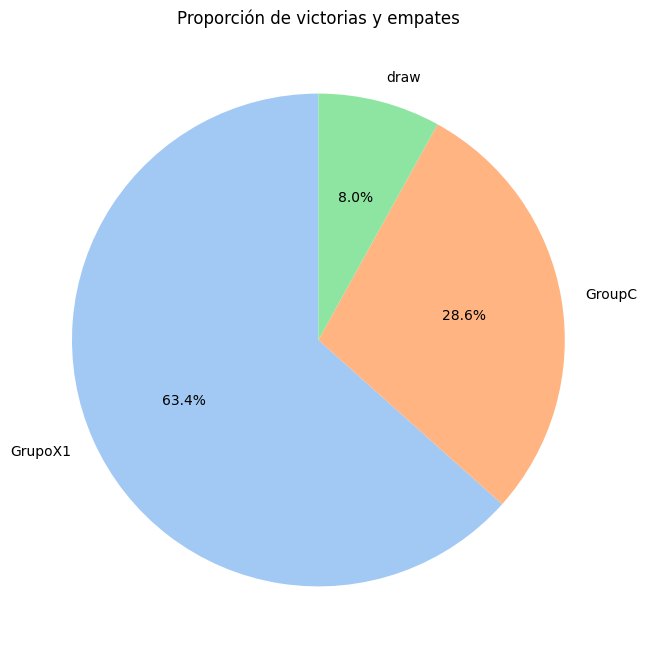

In [68]:
matches = load_matches("versus")
df_games = extract_game_data(matches)

plot_victories(df_games)
plot_avg_game_length(df_games)
plot_game_length_distribution(df_games)
plot_win_draw_ratio(df_games)

In [69]:
def rowWinrate(df_games):
    df_games['first_move'] = df_games['actions'].apply(lambda x: x[0] if x else -1)
    sns.countplot(x='first_move', hue='winner', data=df_games)
    plt.title("Columna inicial vs ganador")
    plt.xlabel("Columna inicial")
    plt.ylabel("Número de victorias")
    plt.show()

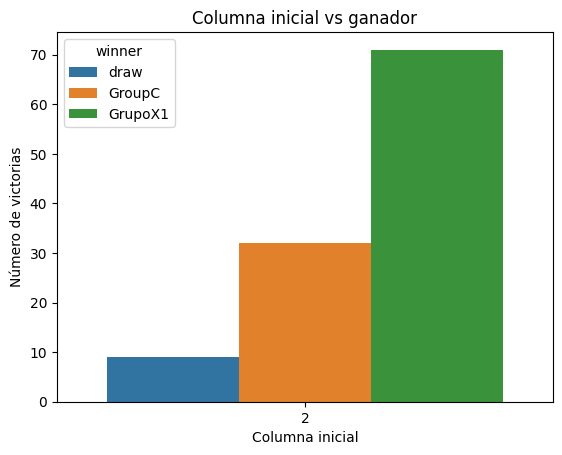

In [70]:
rowWinrate(df_games)